# Linear Regression on NBA Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf  # Using formula API

In [35]:
nba = pd.read_csv('../data/NBA_train.csv')

In [36]:
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


**Data metadata:**

- SeasonEnd: Season year
- Team
- Playoffs: whether or not team made it to the playoffs
- W: Number of games won
- PTS: Total points scored
- oppPTS: Total points opponents scored against the team
- FG: Field goals made
- FGA: Field goal attemtps
- 2P: 2-point field goals made
- 2PA: 2-point field goal attempts
- 3P: 3-point field goals made
- 3PA: 3-point field goal attempts
- FT: Free-throws made
- FTA: Free-throw attempts
- ORB: Offensive rebounds made
- DRB: Defensive rebounds made
- AST: # of assists
- STL: # of steals
- BLK: # of blocks
- TOV: # of turnovers

In [4]:
corr = nba.corr()

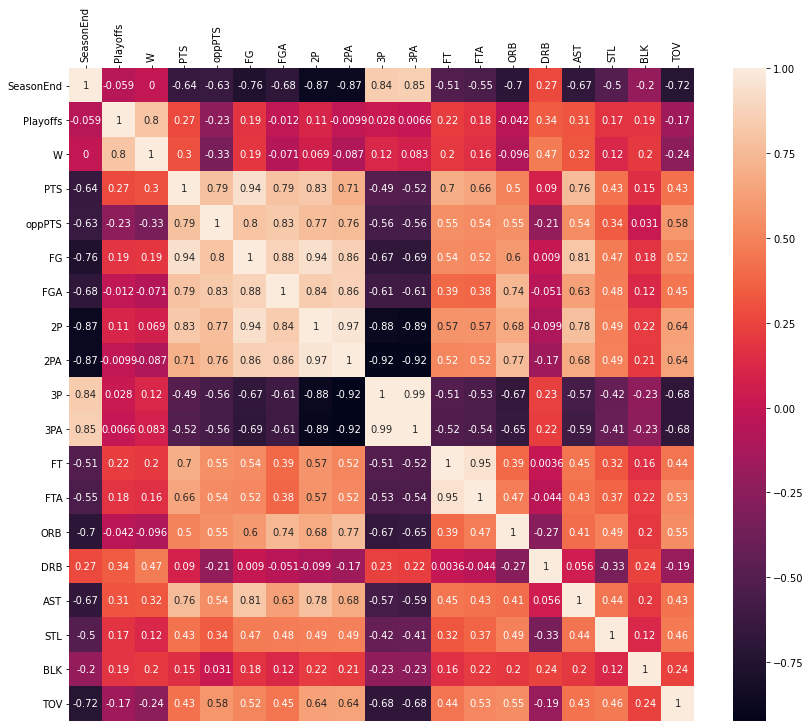

In [5]:
fig, ax = plt.subplots(figsize=(14,12))
ax.xaxis.set_ticks_position('top')
sns.heatmap(data=corr, annot=True);

**Question:** At minimum, about how many games does the team needs to win to make it to the playoffs?

Let's create a pivot table where the rows (index) is number of wins (W) and column is the ```Playoffs``` column and then perform a count on ```Team```.

In [6]:
nba.pivot_table(index='W', columns='Playoffs', values='Team', aggfunc='count').fillna(0)

Playoffs,0,1
W,,
11,2.0,0.0
12,2.0,0.0
13,2.0,0.0
14,2.0,0.0
15,10.0,0.0
16,2.0,0.0
17,11.0,0.0
18,5.0,0.0
19,10.0,0.0


From above, we see that if a team wins at least 35 games, you will start to increase your chance of getting into the playoffs.  But when you win at least 47 games, you will almost always reach the playoffs.

For a more visual representation of wins vs playoff outcome, we can use seaborn's stripplot:

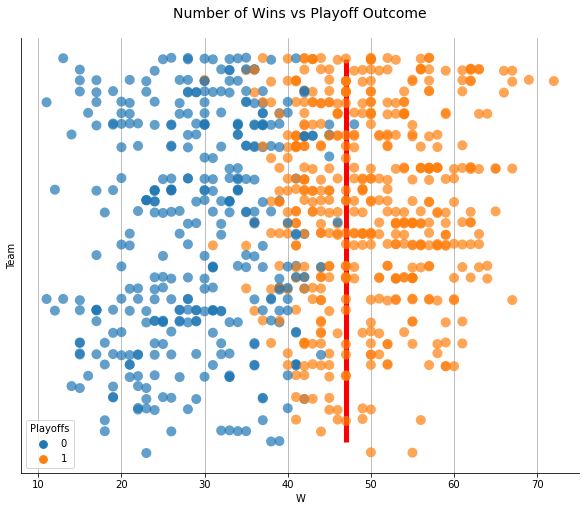

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
(sns.stripplot(x="W",
             y="Team",
             hue="Playoffs",
             data=nba,
             alpha=0.7,
             s=10,
             ax=ax,
            )
).set_yticks([])
plt.vlines(x=47, ymin=0, ymax=35, color='red', linewidth=5)    # Create vertical line@x=47
plt.title("Number of Wins vs Playoff Outcome", pad=20, fontsize=14)
plt.grid(True)
sns.despine()

In [9]:
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


### Can we predict the number of games won by using the difference between points scored and opponents points?

Create a new column called ```PTSdiff```

In [10]:
nba = nba.assign(PTSdiff = nba['PTS'] - nba['oppPTS'])

In [11]:
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PTSdiff
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,...,75,2038,2645,1369,2406,1913,782,539,1495,239
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,...,422,1907,2449,1227,2457,2198,809,308,1539,639
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,...,275,2019,2592,1115,2465,2152,704,392,1684,-222
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,...,187,1702,2205,1307,2381,2108,764,342,1370,28
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,...,255,1871,2539,1311,2524,2079,746,404,1533,-362


### Let's create a scatter plot of wins vs PTSdiff

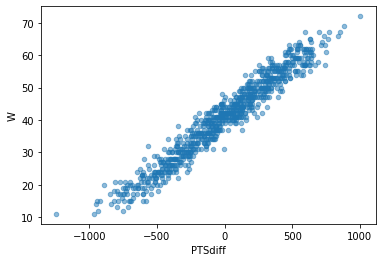

In [20]:
nba.plot.scatter(x='PTSdiff', y='W', alpha=0.5);

From above, we can see that there is a strong positive linear correlation.  So let's create a linear regression model with wins as the dependent variable and PTSdiff as the independent variable

In [16]:
model = smf.ols(formula='W ~ PTSdiff', data=nba).fit()

In [17]:
predictions = model.predict()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:34:32   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.0000      0.106    387.027      0.000      40.792      41.208
PTSdiff        0.0326      0.000    116.681      0.000       0.032       0.033
==============================================================================
Omnibus:                        0.985   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.946
Skew:                           0.082   Prob(JB):                        0.623
Kurtosis:                       3.006   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

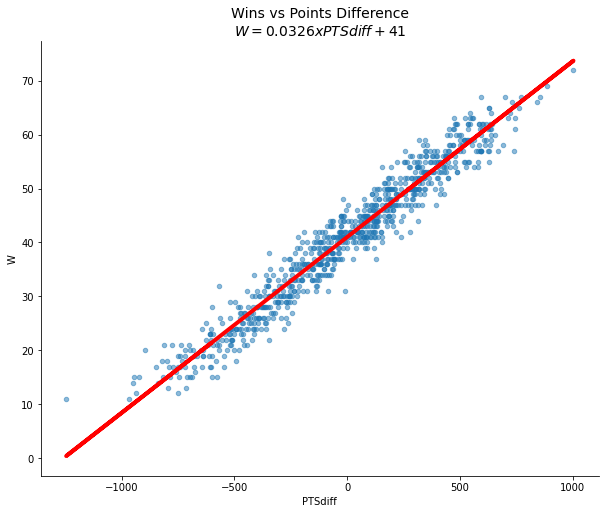

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
nba.plot.scatter(x='PTSdiff', y='W', alpha=0.5, ax=ax)
plt.plot(nba['PTSdiff'], predictions, color='r', linewidth=4,)
sns.despine()
plt.title('Wins vs Points Difference\n$W = 0.0326 x PTSdiff + 41$', fontsize=14);

**Question:** What is the minimal points difference needed to win 47 games?

#### Let's solve for $PTS_{diff}$

$W=0.0326 \bullet PTS_{diff} + 41$

$0.0326 \bullet PTS_{diff} + 41 \geq 47$

$0.0326 \bullet PTSdiff \geq 47 - 41$

$PTS_{diff} \geq \frac{47-41}{0.0326}$

**Answer:** $PTS_{diff} \geq 184$

In [37]:
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


In [52]:
pointsreg = smf.ols(formula="PTS ~ Q('2PA') + Q('3PA') + FTA + AST + ORB + DRB + TOV + STL + BLK", data=nba).fit()

In [53]:
pointsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     817.3
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:16:26   Log-Likelihood:                -5541.1
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     825   BIC:                         1.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2050.8108    203.487    -10.078      0.000   -2450.223   -1651.398
Q('2PA')       1.0429      0.030     35.274      0.000       0.985       1.101
Q('3PA')       1.2586      0.038     32.747      0.000       1.183       1.334
FTA            1.1280      0.034     33.440      0.000       1.062       1.194
AST            0.8858      0.044     20.150      0.000       0.799       0.972
ORB           -0.9554      0.078    -12.261      0.000      -1.108      -0.802
DRB            0.0388      0.062      0.631      0.528      -0.082       0.160
TOV           -0.0248      0.061     -0.405      0.686      -0.145       0.095
STL           -0.1992      0.092     -2.169      0.030      -0.379      -0.019
BLK           -0.0558      0.088     -0.635      0.526      -0.228       0.117
==============================================================================
Omnibus:                        1.265   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.301
Skew:                          -0.094   Prob(JB):                        0.522
Kurtosis:                       2.951   Cond. No.                     2.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
pointsreg.ssr

28394313.99475664

$RMSE = \sqrt{\frac{SSR}{N_{obs}}}$

#### RMSE:

In [58]:
(pointsreg.ssr/nba.shape[0])**0.5

184.40489814749063

#### Let's remove turn over (TOV) from the model:

In [62]:
pointsreg_2 = smf.ols(formula="PTS ~ Q('2PA') + Q('3PA') + FTA + AST + ORB + DRB + STL + BLK", data=nba).fit()

In [64]:
pointsreg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     920.4
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:28:05   Log-Likelihood:                -5541.2
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     826   BIC:                         1.114e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2076.6782    193.084    -10.755      0.000   -2455.672   -1697.684
Q('2PA')       1.0435      0.030     35.366      0.000       0.986       1.101
Q('3PA')       1.2627      0.037     34.099      0.000       1.190       1.335
FTA            1.1254      0.033     34.023      0.000       1.060       1.190
AST            0.8861      0.044     20.173      0.000       0.800       0.972
ORB           -0.9582      0.078    -12.350      0.000      -1.110      -0.806
DRB            0.0389      0.062      0.632      0.527      -0.082       0.160
STL           -0.2068      0.090     -2.301      0.022      -0.383      -0.030
BLK           -0.0586      0.087     -0.670      0.503      -0.230       0.113
==============================================================================
Omnibus:                        1.258   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.296
Skew:                          -0.093   Prob(JB):                        0.523
Kurtosis:                       2.950   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R2 value remained the same after removing turn over (TOV)

#### Let's also remove defensive rebounds (DRB) and blocks (BLK)

In [65]:
pointsreg_3 = smf.ols(formula="PTS ~ Q('2PA') + Q('3PA') + FTA + AST + ORB + STL", data=nba).fit()

In [66]:
pointsreg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:30:06   Log-Likelihood:                -5541.5
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     828   BIC:                         1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2032.7164    162.942    -12.475      0.000   -2352.544   -1712.889
Q('2PA')       1.0500      0.028     37.117      0.000       0.994       1.105
Q('3PA')       1.2731      0.034     37.001      0.000       1.206       1.341
FTA            1.1273      0.033     34.581      0.000       1.063       1.191
AST            0.8884      0.043     20.701      0.000       0.804       0.973
ORB           -0.9743      0.075    -13.051      0.000      -1.121      -0.828
STL           -0.2268      0.084     -2.717      0.007      -0.391      -0.063
==============================================================================
Omnibus:                        1.174   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.222
Skew:                          -0.089   Prob(JB):                        0.543
Kurtosis:                       2.942   Cond. No.                     1.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R2 remained the same.  Let's see what our RMSE looks like now.

In [68]:
pointsreg_3.ssr

28421464.86262352

In [69]:
(pointsreg_3.ssr/nba.shape[0])**0.5

184.493041793472

RMSE only went up very slightly